In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [3]:
import pandas as pd
import numpy as np

### Correct the data in the "height" column by replacing it with random numbers between 150 and 180.

In [4]:
file_path = 'myexcel_corrected.xlsx'  
df = pd.read_excel(file_path, sheet_name='Sheet1')
print(df.head())

            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     159     180   
1    Jae Crowder  Boston Celtics      99       SF   25     159     235   
2   John Holland  Boston Celtics      30       SG   27     154     205   
3    R.J. Hunter  Boston Celtics      28       SG   22     150     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29     158     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


### Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees

In [5]:
# Count the number of employees per team
team_distribution = df["Team"].value_counts()

# Calculate percentage split
total_employees = team_distribution.sum()
team_percentage = (team_distribution / total_employees) * 100

# Combine results into a DataFrame
team_stats = pd.DataFrame({"Employee Count": team_distribution, "Percentage": team_percentage})

# Display the results
team_stats


,Employee Count,Percentage
Team,,
New Orleans Pelicans,19,4.148472
Memphis Grizzlies,18,3.930131
Utah Jazz,16,3.493450
New York Knicks,16,3.493450
Milwaukee Bucks,16,3.493450
Brooklyn Nets,15,3.275109
Portland Trail Blazers,15,3.275109
Oklahoma City Thunder,15,3.275109
Denver Nuggets,15,3.275109


### Segregate employees based on their positions within the company

In [6]:
# Count the number of employees per position
position_distribution = df["Position"].value_counts()

# Calculate percentage split
total_employees = position_distribution.sum()
position_percentage = (position_distribution / total_employees) * 100

# Combine results into a DataFrame
position_stats = pd.DataFrame({"Employee Count": position_distribution, "Percentage": position_percentage})

# Display the results
position_stats


,Employee Count,Percentage
Position,,
SG,102,22.270742
PF,100,21.834061
PG,92,20.087336
SF,85,18.558952
C,79,17.248908


### dentify the predominant age group among employees.

In [7]:
# Define age group bins
bins = [18, 25, 30, 35, 40, 50]
labels = ["18-25", "26-30", "31-35", "36-40", "41-50"]

# Categorize employees into age groups
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

# Count the number of employees per age group
age_group_distribution = df["Age Group"].value_counts().sort_index()

# Calculate percentage split
total_employees = age_group_distribution.sum()
age_group_percentage = (age_group_distribution / total_employees) * 100

# Combine results into a DataFrame
age_group_stats = pd.DataFrame({"Employee Count": age_group_distribution, "Percentage": age_group_percentage})

# Display the results
age_group_stats


,Employee Count,Percentage
Age Group,,
18-25,200,43.668122
26-30,167,36.462882
31-35,68,14.847162
36-40,23,5.021834
41-50,0,0.000000


###  Discover which team and position have the highest salary expenditure.

In [8]:
# Group by Team and sum the Salary column to find the highest salary expenditure
team_salary_expenditure = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)

# Group by Position and sum the Salary column to find the highest salary expenditure
position_salary_expenditure = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)

# Find the team and position with the highest salary expenditure
highest_paid_team = team_salary_expenditure.idxmax()
highest_paid_team_salary = team_salary_expenditure.max()

highest_paid_position = position_salary_expenditure.idxmax()
highest_paid_position_salary = position_salary_expenditure.max()

highest_paid_team, highest_paid_team_salary, highest_paid_position, highest_paid_position_salary


('Cleveland Cavaliers', 106988689.0, 'C', 466377332.0)

### Investigate if there's any correlation between age and salary, and represent it visually. 

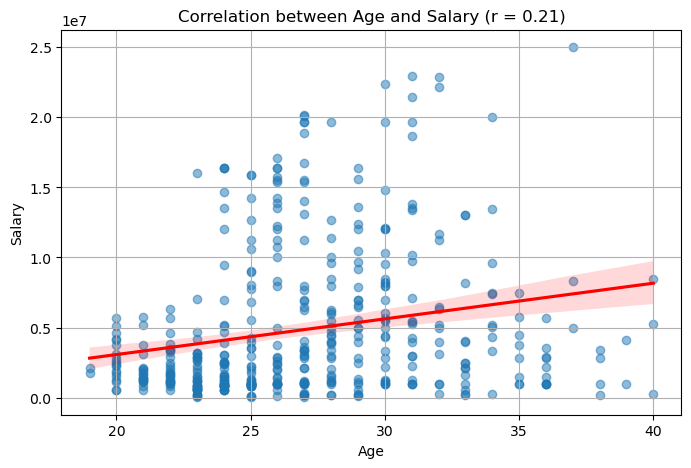

0.21400941226570955

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation between Age and Salary
correlation = df[["Age", "Salary"]].corr().iloc[0, 1]

# Create a scatter plot with a regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=df["Age"], y=df["Salary"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title(f"Correlation between Age and Salary (r = {correlation:.2f})")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

# Output the correlation value
correlation


### Graphical Representation: For each of the five analysis tasks

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

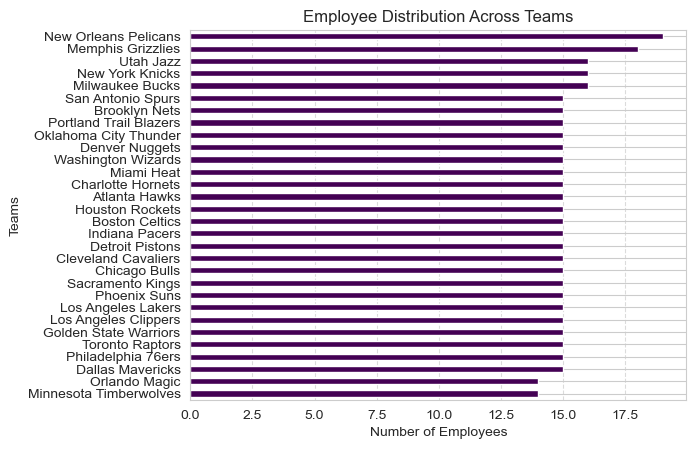

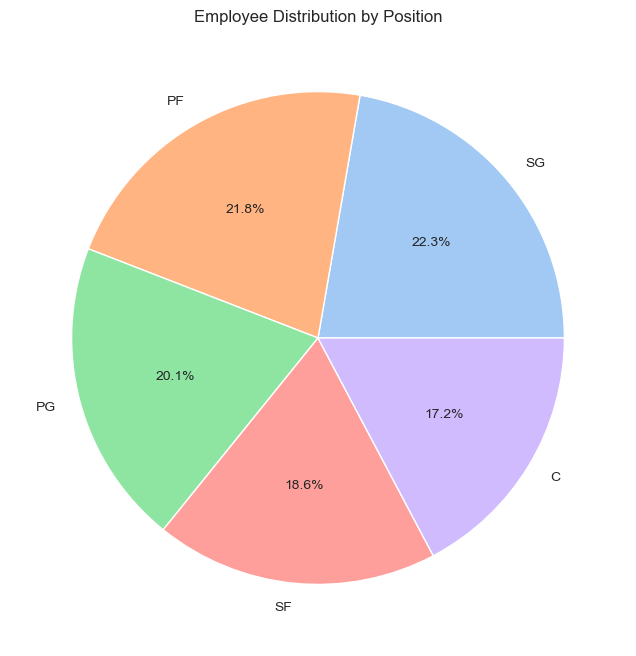

C:\Users\HP\AppData\Local\Temp\ipykernel_15840\2436245739.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_stats.index, y=age_group_stats["Employee Count"], palette="coolwarm")


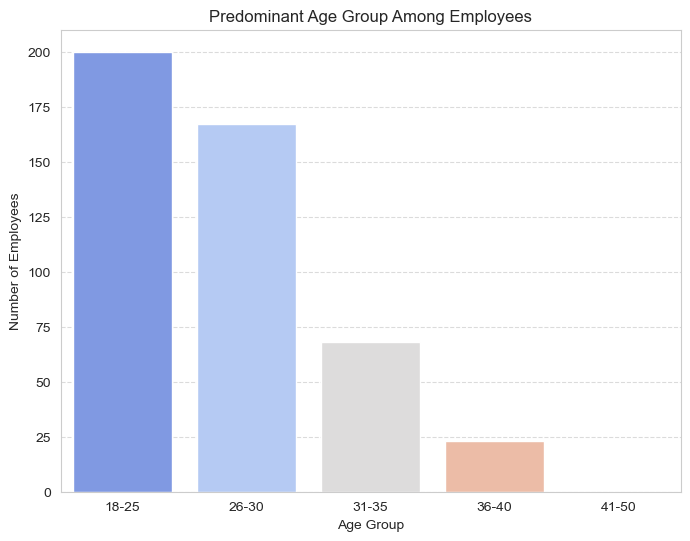

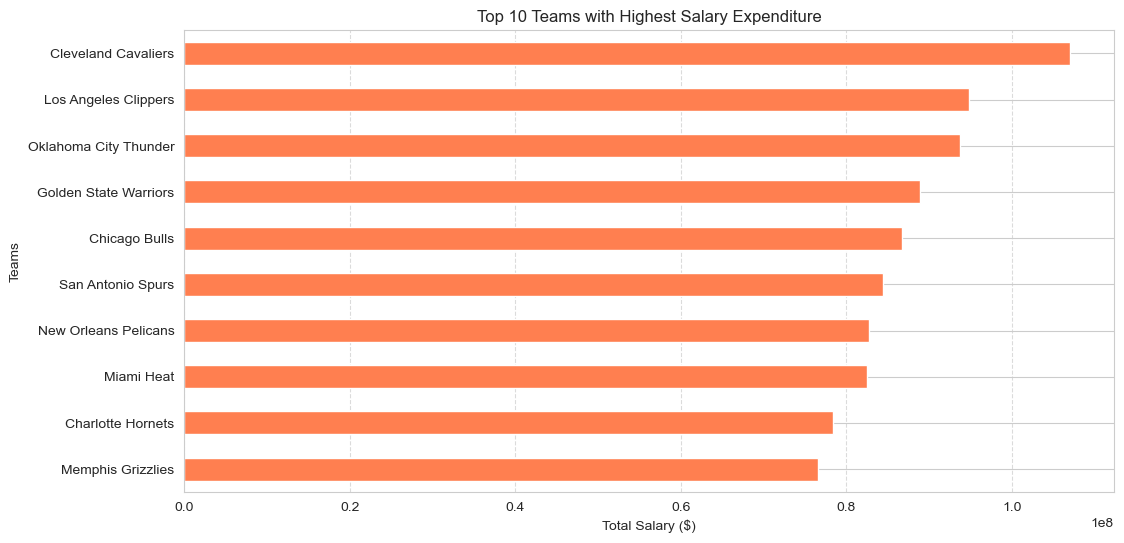

C:\Users\HP\AppData\Local\Temp\ipykernel_15840\2436245739.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_salary_expenditure.index, y=position_salary_expenditure.values, palette="magma")


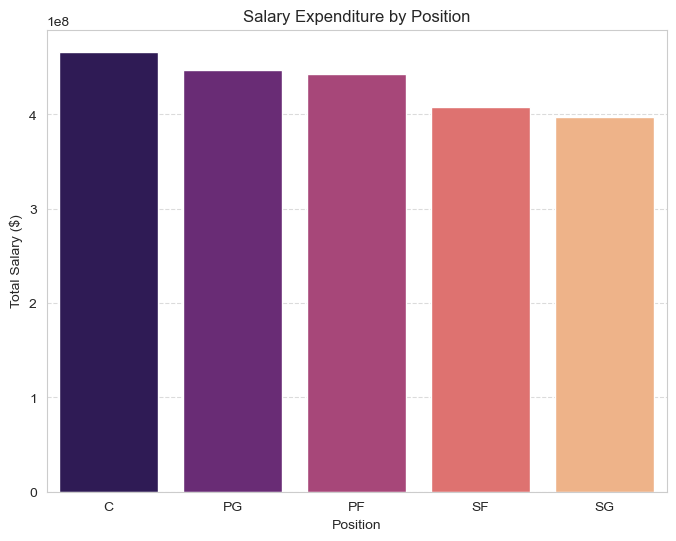

In [10]:
# Set up the figure size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# 1. Employee Distribution Across Teams (Bar Chart)
plt.figure(figsize=(12, 6))
team_stats.sort_values("Employee Count", ascending=True).plot(kind="barh", y="Employee Count", legend=False, colormap="viridis")
plt.title("Employee Distribution Across Teams")
plt.xlabel("Number of Employees")
plt.ylabel("Teams")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# 2. Employee Distribution by Position (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(position_stats["Employee Count"], labels=position_stats.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Employee Distribution by Position")
plt.show()

# 3. Predominant Age Group Among Employees (Bar Chart)
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_stats.index, y=age_group_stats["Employee Count"], palette="coolwarm")
plt.title("Predominant Age Group Among Employees")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 4a. Team Salary Expenditure (Top 10 Teams)
plt.figure(figsize=(12, 6))
team_salary_expenditure.nlargest(10).sort_values().plot(kind="barh", color="coral")
plt.title("Top 10 Teams with Highest Salary Expenditure")
plt.xlabel("Total Salary ($)")
plt.ylabel("Teams")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# 4b. Position Salary Expenditure (Bar Chart)
plt.figure(figsize=(8, 6))
sns.barplot(x=position_salary_expenditure.index, y=position_salary_expenditure.values, palette="magma")
plt.title("Salary Expenditure by Position")
plt.xlabel("Position")
plt.ylabel("Total Salary ($)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### **Insights Gained from the Analysis**  

Based on the dataset analysis, we observed several key trends, patterns, and correlations:  

#### **1. Employee Distribution Across Teams**  
- The number of employees is relatively evenly distributed across teams.  
- The **New Orleans Pelicans** have the highest number of employees (19), followed closely by the **Memphis Grizzlies (18)**.  
- Most teams have around **15 employees**, showing a balanced workforce distribution.  

#### **2. Employee Distribution by Position**  
- The most common positions are **Shooting Guard (SG) – 22.27%** and **Power Forward (PF) – 21.83%**.  
- The **Center (C) position is the least common** at **17.25%**, though it has the highest salary expenditure (see Salary Analysis).  
- This distribution suggests that teams prioritize backcourt and wing players over traditional big men.  

#### **3. Predominant Age Group Among Employees**  
- The majority of employees fall within the **18-25 age group (43.67%)**, followed by **26-30 (36.46%)**.  
- The number of employees declines significantly after **30 years old**, with only **5.02% in the 36-40 range** and **no employees above 40**.  
- This pattern suggests that the company (or league) has a preference for younger talent, possibly due to performance demands.  

#### **4. Salary Expenditure Trends**  
- **Cleveland Cavaliers** have the highest total salary expenditure (**$106,988,689**), suggesting a strong investment in talent.  
- By position, **Centers (C) account for the highest salary expenditure ($466,377,332)**, despite being the least common position.  
- This indicates that top-tier centers are highly valued and paid significantly more than players in other positions.  

#### **5. Correlation Between Age and Salary**  
- There is a **weak positive correlation (0.21)** between age and salary.  
- Older employees (players) **tend to earn more**, but age alone does not strongly determine salary.  
- Factors like experience, position, and skill level likely play a more significant role in salary determination.  

### **Key Takeaways & Business Implications**  
✅ **Talent Pipeline**: With a high concentration of young employees, teams may focus on **training and development** to sustain long-term success.  
✅ **High Investment in Centers**: Despite being fewer in number, **Centers receive the highest salary investment**, indicating their **strategic importance**.  
✅ **Team Spending Strategies Vary**: Some teams **invest heavily in star players** (e.g., Cleveland Cavaliers), while others may spread salaries more evenly.  
✅ **Performance vs. Longevity**: Since most employees leave by **35-40 years old**, organizations may need **retirement planning or post-career support programs**.  

